In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
# Load simulated data
dgp1 = loadmat('../spgarch/data_dgp1.mat')
r_dgp1 = dgp1['R']
s_dgp1 = dgp1['Sigma']
print(r_dgp1.shape)

(4001, 500)


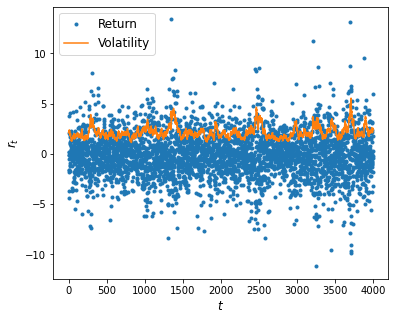

In [3]:
# Plot the first simulated return and volatility series
plt.figure(figsize=(6, 5))
plt.plot(r_dgp1[:, 1], '.', label='Return')
plt.plot(s_dgp1[:, 1], '-', label='Volatility')
plt.xlabel('$t$', fontsize=12)
plt.ylabel('$r_t$', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

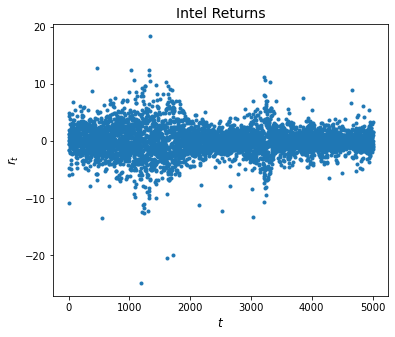

In [4]:
# Load Intel data
intc = loadmat('../spgarch/data_intc.mat')
r_intc = intc['r']
plt.figure(figsize=(6, 5))
plt.plot(r_intc, '.', label='Intel')
plt.xlabel('$t$', fontsize=12)
plt.ylabel('$r_t$', fontsize=12)
plt.title('Intel Returns', fontsize=14)
plt.show()

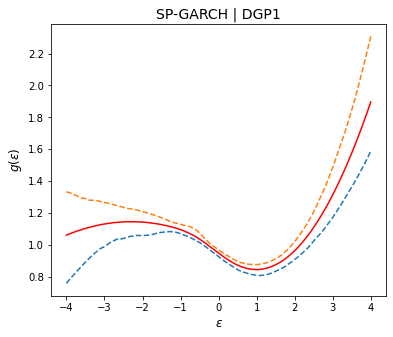

In [5]:
# Load estimation results of SPGARCH on DGP1 (500 batches)
#
# L:   2.5% posterior quantile of parameters (nu, mu, omega).
# U:   97.5% posterior quantile of parameters (nu, mu, omega).
# M:   posterior mean of parameters (nu, mu, omega).
# S:   posterior SD of parameters (nu, mu, omega).
# Sig: estimated volatility series.
# x:   points at which the estimated g function is evaluated.
# Y:   values of the estimated g function at x.
# Pk:  estimated posterior probabilities of knot inclusion.
# acc: acceptance rates
#
spgarch_dgp1 = loadmat('../ppr/spgarch_dgp1.mat')
plt.figure(figsize=(6, 5))
x = np.ravel(spgarch_dgp1['x'])
y = np.mean(spgarch_dgp1['Y'], axis=0)
l = np.quantile(spgarch_dgp1['Y'], q=0.025, axis=0)
u = np.quantile(spgarch_dgp1['Y'], q=0.975, axis=0)
plt.plot(x, y, 'r-')
plt.plot(x, l, '--')
plt.plot(x, u, '--')
plt.xlabel('$\epsilon$', fontsize=12)
plt.ylabel('$g(\epsilon)$', fontsize=12)
plt.title('SP-GARCH | DGP1', fontsize=14)
plt.show()